# CS 195: Natural Language Processing
## Question Answering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F2_3_QuestionAnswering.ipynb)


## References

Hugging Face Task Guide on Question Answering: https://huggingface.co/docs/transformers/tasks/question_answering


## Installing necessary modules

In [ ]:
import sys
!{sys.executable} -m pip install transformers datasets evaluate rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=ac0f030479b9670ac5f453e508f6bd70d52c7b3b63f0720fa408e2d848a85687
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff85

## Question Answering

[roberta-based model](https://huggingface.co/deepset/roberta-base-squad2) trained on the [SQuAD2.0](https://huggingface.co/datasets/squad_v2) question answering data set

Requires two inputs
* a question
* context - where to find the answer

Returns
* an answer
* a location where you can find the answer in the context

In [ ]:
times_delphic_story = """
How does the Supreme Court ruling on affirmative action affect Drake?
The answer has little to do with affirmative action.
Over the summer, the Supreme Court ruled against the admissions programs of Harvard University and the University of North Carolina in an affirmative action decision. Before the decision, race already wasn’t a factor in Drake University admissions, according to Provost Sue Mattison.
“Affirmative action, with regards to admissions, only impacts those really highly selective institutions that limit the number of incoming students,” Mattison said. “So that doesn’t apply to Drake and most institutions across the country.”
She said schools like Harvard and UNC have enough applicants that they can pick and choose which applicants fill a certain number of spots.
Drake’s admissions team found that the university has “admitted all students who have a 3.0 high school GPA or [higher],” Mattison said. “Even though we’ve asked for a person’s race on the admissions form, it does not have an impact on the admissions decision, and it doesn’t displace anybody.”
Possible effects of the court’s ruling
Mark Kende, director of Drake’s Constitutional Law Center, said the Supreme Court “basically has embraced an idea that it calls colorblindness.”
“If you take their principle of colorblindness and extend it beyond universities, to other places, it could raise some problems,” Kende said. “But we don’t know yet.”
Financial aid programs that prioritize applicants of a particular race over another are more vulnerable after the court’s decision, according to Kende. He said it’s not clear what impact the decision might have on university hiring practices that consider an employee’s race, as well as corporations’ diversity programs.
Following the Supreme Court’s decision, Missouri Attorney General Andrew Bailey said Missouri institutions subject to the U.S. Constitution or Title VI must stop using race-based standards “to make decisions about things like admissions, scholarships, programs and employment.”
The University of Missouri System said that “a small number of our programs and scholarships have used race/ethnicity as a factor for admissions and scholarships,” and that “these practices will be discontinued.”
Drake is taking a different approach in the wake of the affirmative action decision. The university is monitoring maybe about forty to fifty scholarships, according to Ryan Zantingh, Drake’s director of financial aid. This is more in anticipation of a comparable case on financial aid that considers race, rather than a reaction to the affirmative action ruling.
Mattison said she thinks Drake is still trying to determine how the Supreme Court decision will impact Drake’s Crew Scholars program, which is for incoming students of color.
“There are ways that we can ensure that we continue Crew Scholars while still being compliant,” Mattison said.
Donors for some Drake scholarships specified that they wanted to support a student of color or a woman in a STEM field, Mattison said.
“And so we’re still working through what that actually means, and what we have to do to continue to achieve the values that we expect,” Mattison said. “There are ways that we can change the wording of some of the scholarships.”
Like all students, students of color may qualify for scholarships for first-generation students or students with financial need.
“There’s a lot of overlap between students of color and other areas where financial aid is directed,” Zantingh said. “Scholarship resources can be directed [to financial need or first generation status] and still reach the same students.”
Even if there is a ruling on financial aid that’s comparable to the affirmative action decision, Zantingh doesn’t expect a large impact on Drake financial aid from either decision.
“There may be some implications, but I think the overall general effect on students will be little to none,” Zantingh said.
Zantingh gave an example of scholarship language offered by legal counsel. If a scholarship is for only minority students, it might become a scholarship that gives preference to students who demonstrate a commitment to Drake’s vision for diversity on campus.
“If a white student is actively involved in anti-racist leadership here on campus, certainly they would fit that description then, wouldn’t they?” Zantingh said. “Basically, the language would not seek to exclude any particular protected class categorically.”
In some cases, a donor might be unwilling to change the scholarship’s language or be deceased, Zantingh said. If a donor is deceased, a judge might approve changes. He said he doesn’t expect Drake to cut any of the scholarships it is monitoring.
“The scholarship criteria would have to change, or the dollars would have to be repurposed in another way. Per either the donor or a court’s approval,” Zantingh said.
Race can still play a role in college admissions
The Supreme Court left at least one legal path open for race to play a role in college admissions.
When admitting students, universities are allowed to consider “an applicant’s discussion of how race affected his or her life, be it through discrimination, inspiration or otherwise,” Chief Justice John Roberts wrote in the Court’s decision. However, “the student must be treated based on his or her experiences as an individual — not on the basis of race.”
A student’s story can emerge without Drake asking for it, according to Dean of Admissions Joel Johnson.
“Especially if they’ve overcome a lot, or it’s so key to their identity… it’ll come out on its own,” Johnson said. “I don’t know if I could say the Supreme Court protected it. They couldn’t have stopped it, honestly.”
Johnson said that caring about diversity also means intentionally recruiting a diverse group of students. He said students can’t join Drake if they never apply in the first place.
In the wake of the Supreme Court’s decision on affirmative action, The Times-Delphic is publishing a series. Check next week’s paper for an article about legacy admissions and legacy financial aid with a Drake focus.

"""

In [ ]:
from transformers import pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Can colleges take race into account when making admissions decisions?',
    'context': times_delphic_story
}
res = nlp(QA_input)
print(res)

{'score': 0.10679316520690918, 'start': 1414, 'end': 1431, 'answer': 'we don’t know yet'}


In [ ]:
print( times_delphic_story[1416:1433] )
print( times_delphic_story[1200:1500] )

 don’t know yet.”
urt “basically has embraced an idea that it calls colorblindness.”
“If you take their principle of colorblindness and extend it beyond universities, to other places, it could raise some problems,” Kende said. “But we don’t know yet.”
Financial aid programs that prioritize applicants of a particular 


### Let's try another question

In [ ]:
QA_input2 = {
    'question' : "Which kinds of schools are most affected by the Supreme Court's affirmative action ruling?",
    'context': times_delphic_story
}
res = nlp(QA_input2)
print(res)

{'score': 0.030723538249731064, 'start': 670, 'end': 685, 'answer': 'Harvard and UNC'}


In [ ]:
print( times_delphic_story[671:686] )
print( times_delphic_story[500:800] )

arvard and UNC 
institutions that limit the number of incoming students,” Mattison said. “So that doesn’t apply to Drake and most institutions across the country.”
She said schools like Harvard and UNC have enough applicants that they can pick and choose which applicants fill a certain number of spots.
Drake’s admi


The answer I was hoping for was `"highly selective institutions"`.

### How you ask the question seems to have an impact on the answer it finds

In [ ]:
QA_input3 = {
    'question' : "Does Drake consider race when deciding to admit a student?",
    'context': times_delphic_story
}
res = nlp(QA_input3)
print(res)

{'score': 0.0995897501707077, 'start': 1414, 'end': 1431, 'answer': 'we don’t know yet'}


In [ ]:
QA_input4 = {
    'question' : "At Drake, does race have an impact on the admissions decision?",
    'context': times_delphic_story
}
res = nlp(QA_input4)
print(res)

{'score': 0.10402798652648926, 'start': 994, 'end': 1047, 'answer': 'it does not have an impact on the admissions decision'}


## Discussion question:

What are some ways you can think of for evaluating question answering models?



*   Compare the generated answer to correct answers
*   Look at the score output



## Group Exercise

Find a question answering *dataset* on Hugging Face. Test out some of the examples from the data set using metrics we decided on.

In [ ]:
from datasets import load_dataset

new_data = load_dataset("dferndz/cSQuAD1")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
new_data

DatasetDict({
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 100
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 100
    })
})

In [ ]:
super_bowl_50 = "Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the 'golden anniversary' with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as 'Super Bowl L'), so that the logo could prominently feature the Arabic numerals 50."

In [ ]:
from transformers import pipeline

model_name = "deepset/roberta-base-squad2"

small_correct = 0
small_total = 0
large_correct = 0
large_total = 0
# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
amount_correct = 0
x=0
for i in new_data['validation']['question']:
  QA_input = {
    'question': i,
    'context': new_data['validation']['context'][x]
  }
  print("QUESTION: ", i)
  res = nlp(QA_input)
  if len(new_data['validation']['context'][x]) < 450:
    small_total += 1
    small_correct += res['score']
  else:
    large_total += 1
    large_correct += res['score']
  print(res)
  x+=1
print("SMALL CONTEXT SCORE: ", (small_correct/small_total))
print("LARGE CONTEXT SCORE: ", (large_correct/large_total))

QUESTION:  Which NFL team won the 50 super bowl?
{'score': 0.6955139636993408, 'start': 177, 'end': 191, 'answer': 'Denver Broncos'}
QUESTION:  In what city was the stadium where the 50 super bowl was played?
{'score': 0.29009732604026794, 'start': 377, 'end': 390, 'answer': 'San Francisco'}
QUESTION:  What was suspended for the Super Bowl 50?
{'score': 0.3469301760196686, 'start': 580, 'end': 644, 'answer': 'the tradition of naming each Super Bowl game with Roman numerals'}
QUESTION:  What team was the champion in Super Bowl 50?
{'score': 0.7805232405662537, 'start': 177, 'end': 191, 'answer': 'Denver Broncos'}
QUESTION:  What color was used in the Super Bowl?
{'score': 0.5282671451568604, 'start': 521, 'end': 525, 'answer': 'gold'}
QUESTION:  What was the theme of Super Bowl 50?
{'score': 0.37680482864379883, 'start': 488, 'end': 506, 'answer': 'golden anniversary'}
QUESTION:  What day was the game played on?
{'score': 0.9398325085639954, 'start': 334, 'end': 350, 'answer': 'February

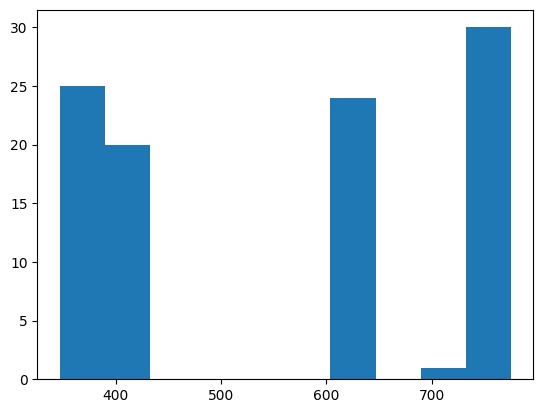

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = []
for i in new_data['validation']['context']:
  x.append(len(i))

plt.hist(x)
plt.show()

In [ ]:
print(new_data['validation']['question'])

['Which NFL team won the 50 super bowl?', 'In what city was the stadium where the 50 super bowl was played?', 'What was suspended for the Super Bowl 50?', 'What team was the champion in Super Bowl 50?', 'What color was used in the Super Bowl?', 'What was the theme of Super Bowl 50?', 'What day was the game played on?', 'What is the AFC short for?', 'What was the theme of Super Bowl 50?', 'What does AFC stand for?', 'What day was the Super Bowl played on?', 'Who won Super Bowl 50?', 'What venue did Super Bowl 50 take place in?', 'What city did Super Bowl 50 take place in?', 'If Roman numerals were used, what would Super Bowl 50 have been called?', 'Super Bowl 50 decided the NFL champion for what season?', 'What year did the Denver Broncos secure a Super Bowl title for the third time?', 'What city did Super Bowl 50 take place in?', 'What stadium did Super Bowl 50 take place in?', 'What was the final score of Super Bowl 50? ', 'What month, day and year did Super Bowl 50 take place? ', 'Wh

## Applied Exploration

Choose a Question Answering model from Hugging Face (you may use the one we used in class). Set up an experiment to answer the following question: How does the length of the context affect the performance of the model?

Answer the following questions:
* What dataset(s) did you use (provide links)?
* Describe the kinds of questions and answers that appear in this data. How do the lengths of the context vary? Maybe provide a histogram that describes this.
* What metrics did you use? Why did you choose those?
* What were your results? Describe what you found and any additional take-aways.

#What dataset did you use?:

I used a dataset that answered questions about Super Bowl 50. It was called cSQuAD1. Here is the link: 'dferndz/cSQuAD1'

#Describe the kinds of questions and answers that appear in this data. How do the lengths of the context vary? Maybe provide a histogram that describes this.

There are many different kinds of questions and answers. Ranging from: Which NFL team won the 50 super bowl? to What Denver player caused two fumbles for the Panthers?

The lengths of the context have a wide spread and this is shown by the histogram below:

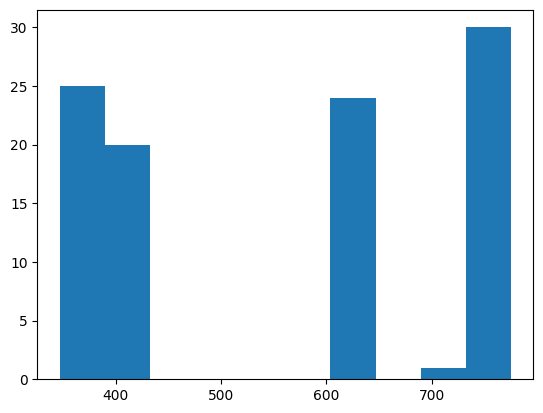

##What metrics did you use? Why did you choose those?

I used rouge metrics. I choose them because they easily allowed for a comparison between the predicted answer and the actual answer. It is also easy to understand the score that is generated.

##What were your results? Describe what you found and any additional take-aways.

The results I found are interesting.

I took the score of context lengths less than 450 and greater than 450. Then labeled them as small context and large context.

HERE ARE THE SCORES:

SMALL CONTEXT SCORE:  0.7745674329499403

LARGE CONTEXT SCORE:  0.6354131492701444


Overall the smaller contexts had a better score than large context!

## What about conversational models?

Some of you have already experimented with the conversational models.

These are more difficult to evaluate than the others we've looked at.

Usually start with a pre-training step like "predict the next/missing word in this sequence"

Fine-tuned with human feedback

Next time, we'll look at a simple model for predicting the next word in a sequence